# Restaurant Reviews Analysis

# *```Aditya Bagad```*

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import re

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

# pd.set_option("display.max_colwidth", 500)

### Reading the Dataset

In [2]:
# Importing the dataset
data = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

### Data Inspection

In [3]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
data.shape

(1000, 2)

In [5]:
data[data['Liked'] == 1].head()

,Review,Liked
0,Wow... Loved this place.,1
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
8,The fries were great too.,1
9,A great touch.,1


In [6]:
data[data['Liked'] == 0].head()

,Review,Liked
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0


In [7]:
data['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

#### Word Clous for All Words

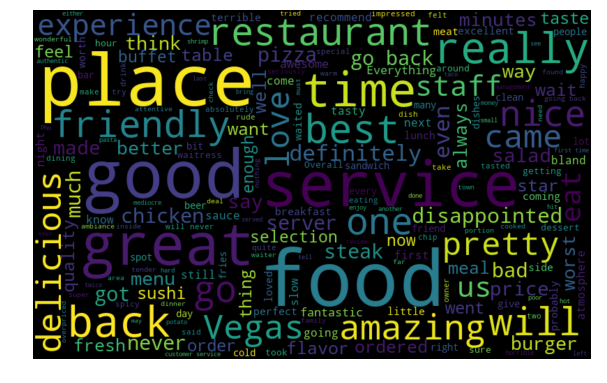

In [8]:
all_words = ' '.join([text for text in data['Review']])

from wordcloud import WordCloud 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7)) 

plt.imshow(wordcloud, interpolation="bilinear") 

plt.axis('off') 

plt.show()

### Text Cleaning

#### 1. Removing Punctuations, Numbers, and Special Characters

In [9]:
data['tidy_review'] = data['Review'].str.lower().str.replace('[^a-zA-Z#]', ' ')
data.head()

,Review,Liked,tidy_review
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...


#### 2. Removing Stop Words

In [10]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stop_words.remove('not')
print(stop_words)

{'being', "weren't", 'having', 'wouldn', 'until', 'into', 'why', 'does', 'these', 'too', 'she', 'there', 'yourself', 'yourselves', 'over', 'by', 'when', "wouldn't", 'her', 'those', "mustn't", 'just', 'will', 'more', 'o', 'from', 'i', 'their', 'under', 'here', 'against', 'nor', 'itself', "didn't", 'himself', 'on', 'after', 'ain', "won't", 'has', 'such', 'have', 'which', 'haven', 'that', 'who', 'as', 'so', 'is', "you've", 'same', 'd', 'aren', 'most', 'can', 'the', 'for', 'myself', 'couldn', 'mustn', 'we', "you're", 'in', 'out', 'off', 'above', 'needn', 'through', 'you', 'both', 'our', 'wasn', 'where', 'me', "you'll", 'at', "you'd", 'herself', 'with', 'own', "wasn't", 'a', 'very', 'whom', 'should', "couldn't", 'between', 'weren', 'then', 'shouldn', 'any', 've', 'because', 'other', 'am', 'up', "it's", "hasn't", 'an', 'only', 'to', 'its', 's', "haven't", 't', 'they', "aren't", 'them', 'all', 'hadn', 'how', 'his', 'ma', 'themselves', 'of', 'm', 'now', 'while', 'ours', 'hers', 'were', 'had', 

In [11]:
data['tidy_review'] = data['tidy_review'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))
data.head()

,Review,Liked,tidy_review
0,Wow... Loved this place.,1,wow loved place
1,Crust is not good.,0,crust not good
2,Not tasty and the texture was just nasty.,0,not tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,selection menu great prices


#### Text Normaliztion

In [12]:
# from nltk.stem.porter import *

# stemmer = PorterStemmer() 

# # Stemming
# stemmer_review = data['tidy_review'].apply(lambda x: ' '.join([stemmer.stem(i) for i in x])) 
    
# data['tidy_review'] = stemmer_review

# data['tidy_review'].head()

### Word Cloud for Reviews

In [13]:
from wordcloud import WordCloud 

def generateWordCloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
    plt.figure(figsize=(10, 7)) 
    plt.imshow(wordcloud, interpolation="bilinear") 
    plt.axis('off') 
    plt.show()

#### 1. Positive Reviews Word Cloud 

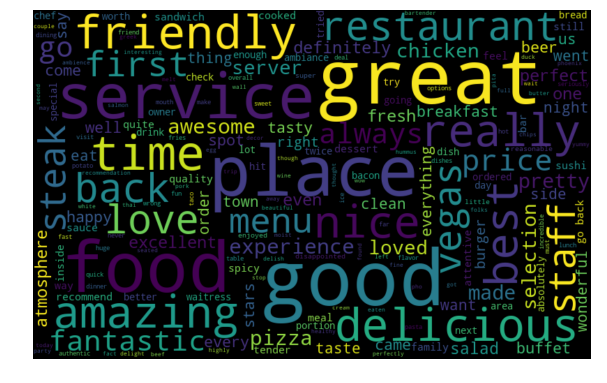

In [14]:
pos_rev_words = ' '.join([text for text in data['tidy_review'][data['Liked'] == 1]])
generateWordCloud(pos_rev_words)

#### Negative Reviews Word Cloud

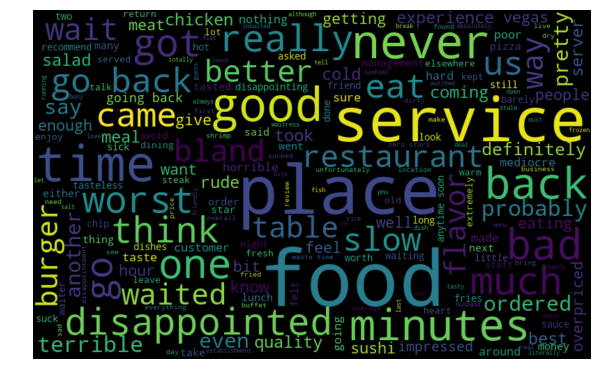

In [15]:
neg_review_words = ' '.join([text for text in data['tidy_review'][data['Liked'] == 0]])
generateWordCloud(neg_review_words)

### Feature Embedding

#### Word2Vec Embedding

- The objective of word embeddings is to redefine the high dimensional word features into low dimensional feature vectors by preserving the contextual similarity in the corpus.


- The advantages of using word embeddings over BOW or TF-IDF are:
  - Dimensionality reduction - significant reduction in the no. of features required to build a model.
  - It capture meanings of the words, semantic relationships and the different types of contexts they are used in.
  
  
- Word2Vec Embeddings
   - Word2Vec is not a single algorithm but a combination of two techniques – **CBOW (Continuous bag of words)** and **Skip-gram model**. Both of these are shallow neural networks which map word(s) to the target variable which is also a word(s). Both of these techniques learn weights which act as word vector representations.
   - CBOW tends to predict the probability of a word given a context. A context may be a single adjacent word or a group of surrounding words. The Skip-gram model works in the reverse manner, it tries to predict the context for a given word.

In [16]:
# Tokenizing 
tokenized_review = data['tidy_review'].apply(lambda x: x.split()) 

In [17]:
import gensim

model_w2v = gensim.models.Word2Vec(
            tokenized_review,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_review, total_examples= len(data['tidy_review']), epochs=20)

(72361, 112020)

In [18]:
model_w2v.wv.most_similar(positive='chicken')

[('salad', 0.999086856842041),
 ('wings', 0.9989897012710571),
 ('driest', 0.9989194869995117),
 ('bland', 0.9988695383071899),
 ('meat', 0.9988555908203125),
 ('fry', 0.9988210201263428),
 ('moist', 0.9988056421279907),
 ('dressing', 0.9987541437149048),
 ('beef', 0.9987484812736511),
 ('vinegrette', 0.9987462759017944)]

In [19]:
tokenized_review.head()

0                                  [wow, loved, place]
1                                   [crust, not, good]
2                         [not, tasty, texture, nasty]
3    [stopped, late, may, bank, holiday, rick, stev...
4                     [selection, menu, great, prices]
Name: tidy_review, dtype: object

In [20]:
# below function is used to create a vector for each tweet by taking the average of the vectors of the words present 
# in the tweet.
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary                                            
            continue
            
    if count != 0:
        vec /= count
        
    return vec

# Preparing word2vec feature set
wordvec_arrays = np.zeros((len(tokenized_review), 200)) 

for i in range(len(tokenized_review)):
    wordvec_arrays[i,:] = word_vector(tokenized_review[i], 200)

wordvec_df = pd.DataFrame(wordvec_arrays) 

wordvec_df.shape

(1000, 200)

#### Count Vectorizer

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 200)

count_vectorizer = cv.fit_transform(data['tidy_review']).toarray()

count_vectorizer.shape

(1000, 200)

#### Tf - IDF Vectorizer

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.90, min_df=2, max_features=200) 

tfidf_vectorizer = tfidf.fit_transform(data['tidy_review']) 

tfidf_vectorizer.shape

(1000, 200)

### Splitting the Dataset

In [23]:
from sklearn.model_selection import train_test_split

X = wordvec_df
y = data['Liked']

# Word2Vec
x_train_wordvec, x_test_wordvec, y_train_wordvec, y_test_wordvec = train_test_split(X, y, test_size=0.3, random_state=42)

# Count Vectorizer
x_train_cv, x_test_cv, y_train_cv, y_test_cv = count_vectorizer[x_train_wordvec.index], count_vectorizer[x_test_wordvec.index], y[y_train_wordvec.index], y[y_test_wordvec.index]

# Tf-Idf Vectorizer
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = tfidf_vectorizer[x_train_wordvec.index], tfidf_vectorizer[x_test_wordvec.index], y[y_train_wordvec.index], y[y_test_wordvec.index]

In [24]:
x_train_cv.shape, y_train_cv.shape

((700, 200), (700,))

### Modeling

In [25]:
def makePredictions(x_train, x_test, y_train, y_test, model, name):
    model.fit(x_train, y_train) 
    y_pred = model.predict(x_test)
    print(name)
    print('Accuracy - ', round(accuracy_score(y_test,y_pred),4))
    print(confusion_matrix(y_test, y_pred))
    print()

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression 

lreg = LogisticRegression(solver='lbfgs') 

# Word2Vec
makePredictions(x_train_wordvec, x_test_wordvec, y_train_wordvec, y_test_wordvec, lreg, 'Logistc Regression - Word2Vec')

# Count Vectorizer
makePredictions(x_train_cv, x_test_cv, y_train_cv, y_test_cv, lreg, 'Logistc Regression - Count Vectorizer')

# Tf-Idf Vectorizer
makePredictions(x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf, lreg, 'Logistc Regression - Tf-Idf Vectorizer')

Logistc Regression - Word2Vec
Accuracy -  0.5333
[[ 27 125]
 [ 15 133]]

Logistc Regression - Count Vectorizer
Accuracy -  0.7667
[[123  29]
 [ 41 107]]

Logistc Regression - Tf-Idf Vectorizer
Accuracy -  0.7767
[[134  18]
 [ 49  99]]



In [27]:
from sklearn import svm

svm = svm.SVC(kernel='linear', gamma=1)

# Word2Vec
makePredictions(x_train_wordvec, x_test_wordvec, y_train_wordvec, y_test_wordvec, svm, 'SVM - Word2Vec')

# Count Vectorizer
makePredictions(x_train_cv, x_test_cv, y_train_cv, y_test_cv, svm, 'SVM - Count Vectorizer')

# Tf-Idf Vectorizer
makePredictions(x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf, svm, 'SVM - Tf-Idf Vectorizer')

SVM - Word2Vec
Accuracy -  0.5067
[[  4 148]
 [  0 148]]

SVM - Count Vectorizer
Accuracy -  0.7767
[[132  20]
 [ 47 101]]

SVM - Tf-Idf Vectorizer
Accuracy -  0.76
[[127  25]
 [ 47 101]]

